## 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

dt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/pre_data/finalfinal_data.csv')
rf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/pre_data/rf_fill.csv')

In [ ]:
dt.head(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2012-05-01 0:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18
1,2012-05-01 0:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18
2,2012-05-01 0:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,290.0,726.42,275.3,540.18


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269424 entries, 0 to 269423
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ymdhm       269424 non-null  object 
 1   swl         269424 non-null  float64
 2   inf         269424 non-null  float64
 3   sfw         269424 non-null  float64
 4   ecpc        269424 non-null  float64
 5   tototf      269424 non-null  float64
 6   tide_level  269424 non-null  float64
 7   wl_1018662  269424 non-null  float64
 8   fw_1018662  269424 non-null  float64
 9   wl_1018680  269424 non-null  float64
 10  wl_1018683  269424 non-null  float64
 11  fw_1018683  269424 non-null  float64
 12  wl_1019630  269424 non-null  float64
 13  fw_1019630  269424 non-null  float64
dtypes: float64(13), object(1)
memory usage: 28.8+ MB


In [ ]:
rf.columns

Index(['ymdhm', 'rf_10184100', 'rf_10184110', 'rf_10184140'], dtype='object')

In [ ]:
rf = rf.fillna(0)

In [ ]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276336 entries, 0 to 276335
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ymdhm        276336 non-null  object 
 1   rf_10184100  276336 non-null  float64
 2   rf_10184110  276336 non-null  float64
 3   rf_10184140  276336 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.4+ MB


In [ ]:
rf = rf[['rf_10184100', 'rf_10184110', 'rf_10184140']]

In [ ]:
total = pd.concat([dt, rf], axis=1)
total.head()

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 0:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 0:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 0:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 0:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 0:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,291.0,707.17,277.3,564.29,0.0,0.0,0.0


In [ ]:
train = total[:110448]
test = total[110448:119232]

In [ ]:
print(train.shape)
print(test.shape)

(110448, 17)
(8784, 17)


In [ ]:
train.head(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 0:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 0:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 0:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,290.0,726.42,275.3,540.18,0.0,0.0,0.0


In [ ]:
train.tail(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
110445,2016-05-31 23:30,25.160,330.78,217.27,26.73,126.98,346.0,292.7,349.79,280.2,277.0,265.79,271.3,493.58,0.0,0.0,0.0
110446,2016-05-31 23:40,25.165,433.25,217.45,26.55,126.95,367.0,292.7,349.79,280.2,277.0,274.10,271.3,493.58,0.0,0.0,0.0
110447,2016-05-31 23:50,25.168,433.23,217.54,26.46,126.93,387.0,292.7,349.79,280.2,277.0,249.18,271.3,493.58,0.0,0.0,0.0


In [ ]:
train2 = train.iloc[:,1:]
train2.tail(1)

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
110447,25.168,433.23,217.54,26.46,126.93,387.0,292.7,349.79,280.2,277.0,249.18,271.3,493.58,0.0,0.0,0.0


## 데이터 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 선언 및 Fitting
mMscaler = MinMaxScaler()
mMscaler.fit(train2)

# 데이터 변환
mMscaled_data = mMscaler.transform(train2)

# 데이터 프레임으로 저장
train_sc = pd.DataFrame(mMscaled_data, columns=train2.columns)

In [ ]:
train_sc.head(3)

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,0.554258,0.081909,0.545581,0.454419,0.029814,0.503129,0.065617,0.024640,0.081633,0.070492,0.202260,0.080569,0.021332,0.0,0.0,0.0
1,0.550137,0.076474,0.541392,0.458807,0.030239,0.508135,0.070866,0.027800,0.081633,0.070492,0.202344,0.080569,0.021332,0.0,0.0,0.0
2,0.546703,0.077286,0.538001,0.461999,0.030964,0.510638,0.069554,0.027001,0.083203,0.070492,0.202090,0.080569,0.021332,0.0,0.0,0.0


In [ ]:
train_sc = pd.concat([train['ymdhm'], train_sc], axis=1)
train_sc.head(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 0:00,0.554258,0.081909,0.545581,0.454419,0.029814,0.503129,0.065617,0.024640,0.081633,0.070492,0.202260,0.080569,0.021332,0.0,0.0,0.0
1,2012-05-01 0:10,0.550137,0.076474,0.541392,0.458807,0.030239,0.508135,0.070866,0.027800,0.081633,0.070492,0.202344,0.080569,0.021332,0.0,0.0,0.0
2,2012-05-01 0:20,0.546703,0.077286,0.538001,0.461999,0.030964,0.510638,0.069554,0.027001,0.083203,0.070492,0.202090,0.080569,0.021332,0.0,0.0,0.0


In [ ]:
train_sc.describe()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
count,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000,110448.000000
mean,0.792260,0.077467,0.755227,0.244794,0.025794,0.379536,0.085701,0.049527,0.099440,0.098651,0.192655,0.131565,0.048926,0.001930,0.001518,0.001282
std,0.082920,0.054613,0.112066,0.112067,0.048593,0.217609,0.085284,0.099482,0.089264,0.090364,0.056176,0.106075,0.068436,0.022805,0.017328,0.015682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.752747,0.056125,0.705366,0.164971,0.006833,0.187735,0.036745,0.008997,0.045526,0.044262,0.175479,0.063981,0.016121,0.000000,0.000000,0.000000
50%,0.807692,0.062509,0.781169,0.218831,0.008864,0.350438,0.060367,0.021579,0.073783,0.073770,0.182648,0.104265,0.029517,0.000000,0.000000,0.000000
75%,0.844093,0.078500,0.835029,0.294833,0.027058,0.556946,0.102362,0.048806,0.119309,0.121311,0.199744,0.168246,0.055999,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 모델링

In [ ]:
from glob import glob
from tqdm import tqdm
from scipy import interpolate

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, AveragePooling1D, GlobalAveragePooling1D

In [ ]:
train_data = []
train_label = []

for j in tqdm(range(len(train)-432)):
  train_data.append(np.array(train.loc[j:j+431, ["swl", "inf", "sfw", "ecpc",
                                                       "tototf", "tide_level",
                                                       "fw_1018662", "fw_1018683", "fw_1019630", "rf_10184100",	"rf_10184110", "rf_10184140"]]).astype(float))
  
  train_label.append(np.array(train.loc[j+432, ["wl_1018662", "wl_1018680",
                                                      "wl_1018683", "wl_1019630"]]).astype(float))

100%|██████████| 110016/110016 [02:40<00:00, 683.85it/s]


In [ ]:
train_data = np.array(train_data)
train_label = np.array(train_label)

print(train_data.shape)
print(train_label.shape)

(110016, 432, 12)
(110016, 4)


In [ ]:
input_shape = (train_data[0].shape[0], train_data[0].shape[1])

model = Sequential()
model.add(LSTM(256, input_shape = input_shape))
model.add(Dense(4, activation = 'relu'))

optimizer = tf.optimizers.RMSprop(0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
model.fit(train_data, train_label, epochs=6, batch_size=128)

Epoch 1/6
860/860 [==============================] - 2582s 3s/step - loss: 54903.0547 - mae: 222.2191
Epoch 2/6
860/860 [==============================] - 2541s 3s/step - loss: 8607.3672 - mae: 67.7344
Epoch 3/6
860/860 [==============================] - 2593s 3s/step - loss: 3017.1594 - mae: 34.7831
Epoch 4/6
860/860 [==============================] - 2620s 3s/step - loss: 1420.1886 - mae: 16.9682
Epoch 5/6
860/860 [==============================] - 2605s 3s/step - loss: 660.4777 - mae: 10.6905
Epoch 6/6
822/860 [===========================>..] - ETA: 1:55 - loss: 460.0188 - mae: 8.9245

In [ ]:
test.head(3)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
110448,2016-06-01 0:00,25.140,325.000,215.79,28.21,121.00,406.0,291.7,343.69,280.2,276.0,302.74,271.3,493.58,0.0,0.0,0.0
110449,2016-06-01 0:10,25.139,24.920,216.50,27.50,127.12,425.0,291.7,343.69,279.2,276.0,252.97,271.3,493.58,0.0,0.0,0.0
110450,2016-06-01 0:20,25.131,23.736,216.20,27.80,127.17,442.0,291.7,343.69,279.2,276.0,269.56,271.3,493.58,0.0,0.0,0.0


In [ ]:
test = test.reset_index()

In [ ]:
test.head(3)

,index,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,110448,2016-06-01 0:00,25.140,325.000,215.79,28.21,121.00,406.0,291.7,343.69,280.2,276.0,302.74,271.3,493.58,0.0,0.0,0.0
1,110449,2016-06-01 0:10,25.139,24.920,216.50,27.50,127.12,425.0,291.7,343.69,279.2,276.0,252.97,271.3,493.58,0.0,0.0,0.0
2,110450,2016-06-01 0:20,25.131,23.736,216.20,27.80,127.17,442.0,291.7,343.69,279.2,276.0,269.56,271.3,493.58,0.0,0.0,0.0


In [ ]:
test.tail(3)

,index,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
8781,119229,2016-07-31 23:30,25.269,543.51,221.31,22.70,131.81,74.0,324.7,574.28,311.2,309.0,360.38,303.3,926.70,0.0,0.0,0.0
8782,119230,2016-07-31 23:40,25.275,652.54,221.53,22.47,137.74,90.0,323.7,566.40,311.2,308.0,368.56,302.3,911.07,0.0,0.0,0.0
8783,119231,2016-07-31 23:50,25.283,651.70,221.81,22.20,137.70,107.0,323.7,566.40,310.2,307.0,376.72,300.3,880.22,0.0,0.0,0.0


In [ ]:
test.columns

Index(['index', 'ymdhm', 'swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level',
       'wl_1018662', 'fw_1018662', 'wl_1018680', 'wl_1018683', 'fw_1018683',
       'wl_1019630', 'fw_1019630', 'rf_10184100', 'rf_10184110',
       'rf_10184140'],
      dtype='object')

In [ ]:
test2 = test[['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level',
       'wl_1018662', 'fw_1018662', 'wl_1018680', 'wl_1018683', 'fw_1018683',
       'wl_1019630', 'fw_1019630', 'rf_10184100', 'rf_10184110',
       'rf_10184140']]

In [ ]:
mMscaled_test = mMscaler.transform(test2)
test_sc = pd.DataFrame(mMscaled_test, columns=test2.columns)

In [ ]:
test_sc = pd.concat([test['ymdhm'], test_sc], axis=1)
test_sc.head(2)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2016-06-01 0:00,0.787775,0.068082,0.480152,0.519848,0.006500,0.454318,0.040682,0.010958,0.050235,0.047541,0.180825,0.07109,0.018302,0.0,0.0,0.0
1,2016-06-01 0:10,0.787088,0.050042,0.494315,0.505685,0.006829,0.478098,0.040682,0.010958,0.048666,0.047541,0.178327,0.07109,0.018302,0.0,0.0,0.0


In [ ]:
test_data= []
test_label = []

for j in tqdm(range(0, len(test)-432)):
  test_data.append(np.array(test.loc[j:j+431, ["swl", "inf", "sfw", "ecpc",
                                                    "tototf", "tide_level",
                                                    "fw_1018662",
                                                    "fw_1018683", "fw_1019630", "rf_10184100",	"rf_10184110", "rf_10184140"]]).astype(float))
  test_label.append(np.array(test.loc[j+432, ["wl_1018662", "wl_1018680",
                                                    "wl_1018683", "wl_1019630"]]).astype(float))

100%|██████████| 8352/8352 [00:11<00:00, 744.93it/s]


In [ ]:
test_data = np.array(test_data)
test_label = np.array(test_label)

print(test_data.shape)
print(test_label.shape)

(8352, 432, 12)
(8352, 4)


In [ ]:
pred = model.predict(test_data)
pred = pd.DataFrame(pred)

In [ ]:
pred.head(3)

,0,1,2,3
0,312.292053,299.390076,295.078125,289.212952
1,311.869141,298.989227,294.666290,289.000732
2,310.165955,297.389893,293.075134,287.806885


In [ ]:
total[total['ymdhm'] == '2016-06-01 0:00']

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
110448,2016-06-01 0:00,25.14,325.0,215.79,28.21,121.0,406.0,291.7,343.69,280.2,276.0,302.74,271.3,493.58,0.0,0.0,0.0


In [ ]:
total[total['ymdhm'] == '2016-07-31 23:50']

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
119231,2016-07-31 23:50,25.283,651.7,221.81,22.2,137.7,107.0,323.7,566.4,310.2,307.0,376.72,300.3,880.22,0.0,0.0,0.0


In [ ]:
total = total[110880:119232]
total.head(2)

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
110880,2016-06-04 0:00,25.130,121.0,216.15,27.85,121.0,46.0,311.7,476.21,300.2,298.0,440.52,291.3,748.09,0.0,0.0,0.0
110881,2016-06-04 0:10,25.102,127.1,215.12,28.88,127.1,51.0,310.7,469.05,299.2,297.0,422.83,290.3,734.09,0.0,0.0,0.0


In [ ]:
total = total[['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

In [ ]:
total = total.reset_index()
total = total[['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]
total.head(2)

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,311.7,300.2,298.0,291.3
1,310.7,299.2,297.0,290.3


In [ ]:
import matplotlib.pyplot as plt

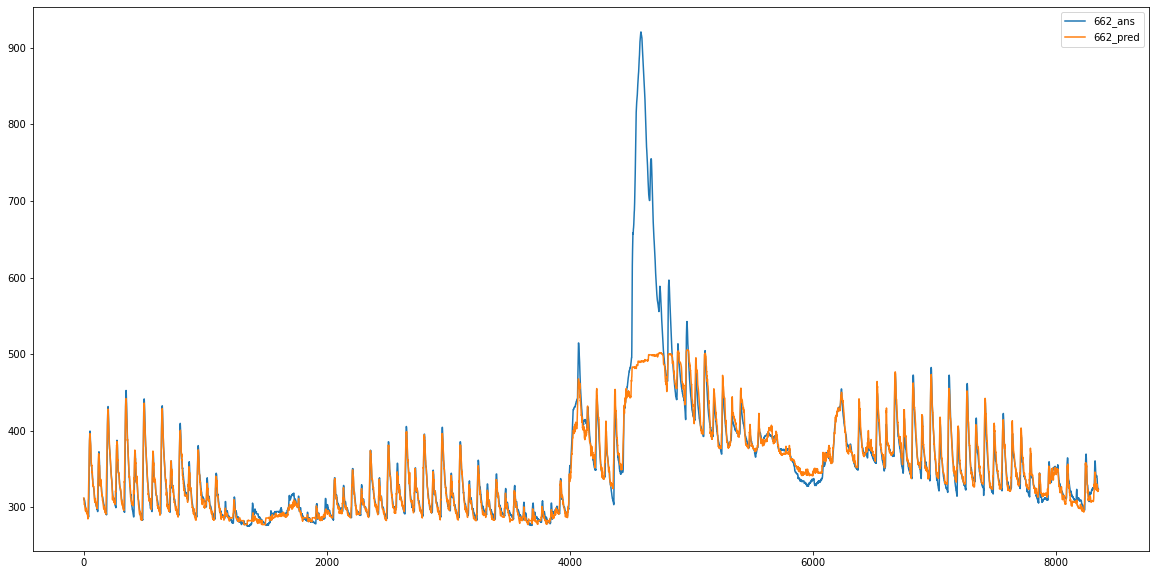

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(total.index, total['wl_1018662'], label = '662_ans')
plt.plot(pred.index, pred[0], label = '662_pred')
plt.legend()
plt.show()

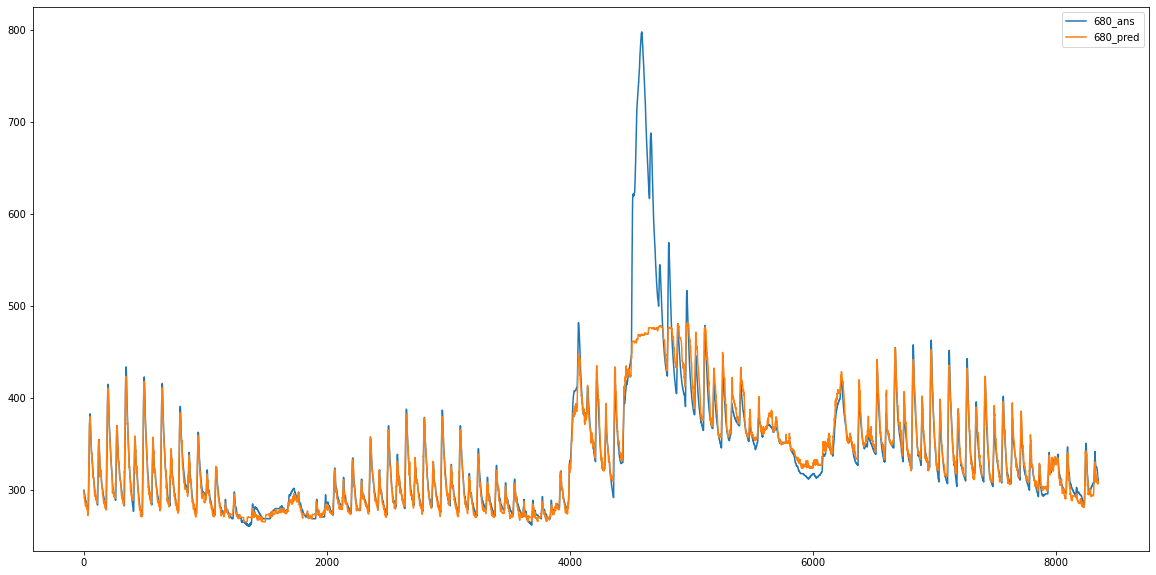

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(total.index, total['wl_1018680'], label = '680_ans')
plt.plot(pred.index, pred[1], label = '680_pred')
plt.legend()
plt.show()

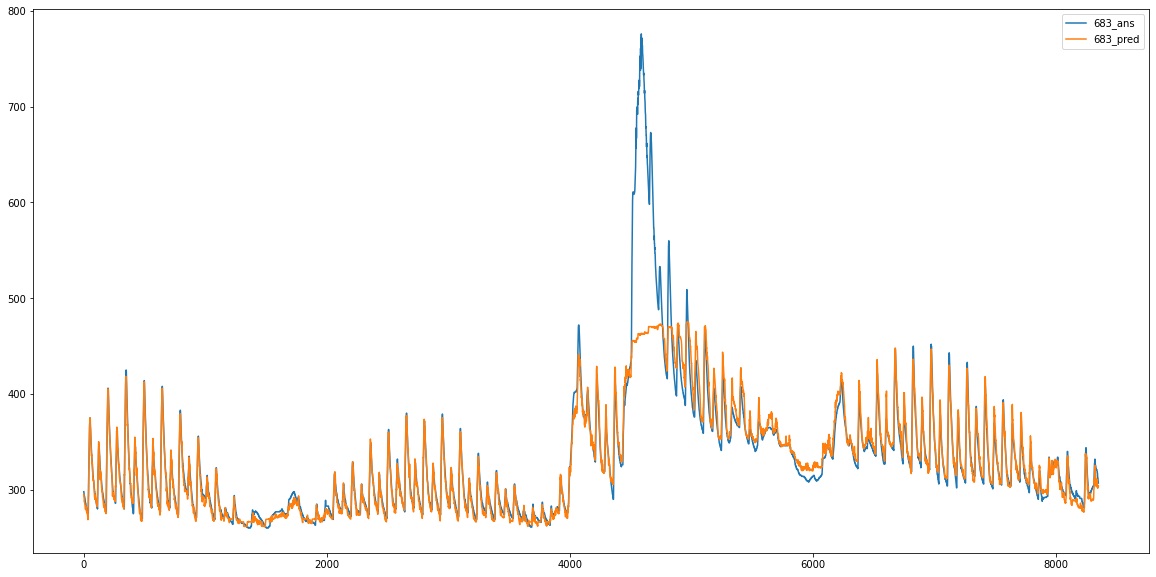

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(total.index, total['wl_1018683'], label = '683_ans')
plt.plot(pred.index, pred[2], label = '683_pred')
plt.legend()
plt.show()

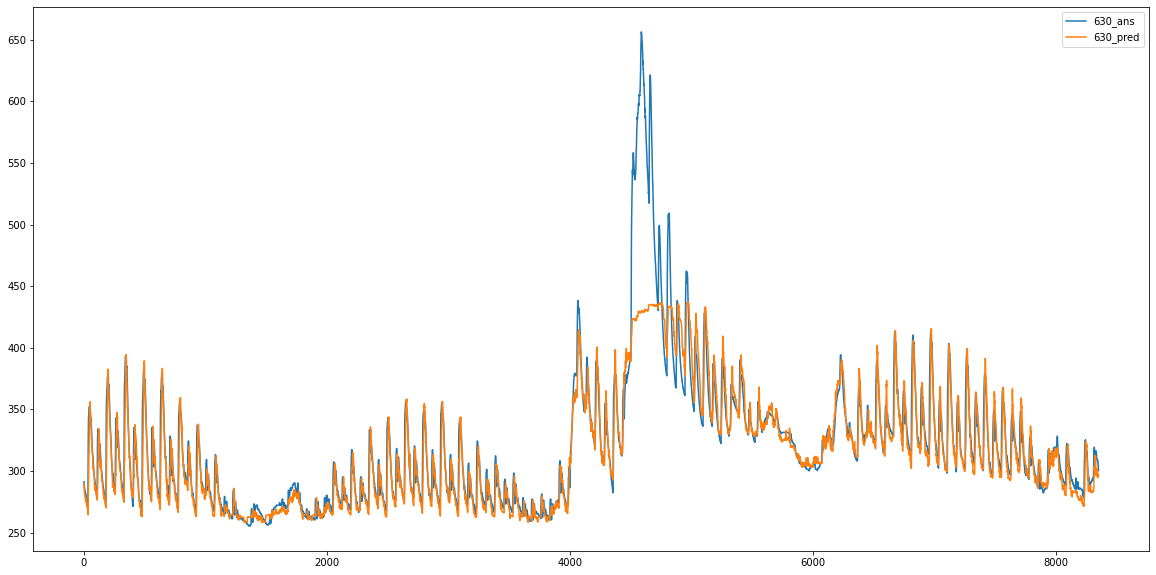

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(total.index, total['wl_1019630'], label = '630_ans')
plt.plot(pred.index, pred[3], label = '630_pred')
plt.legend()
plt.show()

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

mean_absolute_error(total, pred)

12.134491211427381

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(total, pred) 
np.sqrt(MSE)

36.300812638594834

In [ ]:
from sklearn.metrics import r2_score
r2_score(total, pred)

0.7576380593658911

In [ ]:
import pandas as pd
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/sample_submission.csv')

In [ ]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ymdhm       6912 non-null   object
 1   wl_1018662  6912 non-null   int64 
 2   wl_1018680  6912 non-null   int64 
 3   wl_1018683  6912 non-null   int64 
 4   wl_1019630  6912 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 270.1+ KB


In [ ]:
sub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/sub1.csv')

In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       6912 non-null   object 
 1   wl_1018662  6912 non-null   float64
 2   wl_1018680  6912 non-null   float64
 3   wl_1018683  6912 non-null   float64
 4   wl_1019630  6912 non-null   float64
dtypes: float64(4), object(1)
memory usage: 270.1+ KB


In [ ]:
sample_submission.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,0,0,0,0
1,2022-06-01 00:10,0,0,0,0
2,2022-06-01 00:20,0,0,0,0
3,2022-06-01 00:30,0,0,0,0
4,2022-06-01 00:40,0,0,0,0


In [ ]:
sub['ymdhm'] = sample_submission['ymdhm']

In [ ]:
sub.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,278.69116,264.55710,267.93930,269.23572
1,2022-06-01 00:10,280.64270,265.79250,268.69095,267.23690
2,2022-06-01 00:20,283.63614,268.74540,269.84302,264.23593
3,2022-06-01 00:30,284.63430,268.45477,268.90390,261.23743
4,2022-06-01 00:40,283.63614,267.73492,267.41147,259.23798


In [ ]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       6912 non-null   object 
 1   wl_1018662  6912 non-null   float64
 2   wl_1018680  6912 non-null   float64
 3   wl_1018683  6912 non-null   float64
 4   wl_1019630  6912 non-null   float64
dtypes: float64(4), object(1)
memory usage: 270.1+ KB


In [ ]:
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/sub1_.csv')

In [ ]:
sub1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/submission1.csv')
sub1.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-6-1 0:00,278.69116,264.55710,267.93930,269.23572
1,2022-6-1 0:10,280.64270,265.79250,268.69095,267.23690
2,2022-6-1 0:20,283.63614,268.74540,269.84302,264.23593
3,2022-6-1 0:30,284.63430,268.45477,268.90390,261.23743
4,2022-6-1 0:40,283.63614,267.73492,267.41147,259.23798


In [ ]:
sub1.tail()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
6907,2022-7-18 23:10,287.63657,281.45627,289.70416,306.22794
6908,2022-7-18 23:20,286.63428,287.34190,293.43274,308.22662
6909,2022-7-18 23:30,298.62708,295.40100,301.50876,310.22733
6910,2022-7-18 23:40,308.62167,298.39880,305.08417,312.22680
6911,2022-7-18 23:50,325.62424,307.39066,310.69650,313.22568


In [ ]:
sub1['ymdhm'] = pd.to_datetime(sub1['ymdhm'], infer_datetime_format=True)

In [ ]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6912 entries, 0 to 6911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ymdhm       6912 non-null   datetime64[ns]
 1   wl_1018662  6912 non-null   float64       
 2   wl_1018680  6912 non-null   float64       
 3   wl_1018683  6912 non-null   float64       
 4   wl_1019630  6912 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 270.1 KB


In [ ]:
sub1.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00:00,278.69116,264.55710,267.93930,269.23572
1,2022-06-01 00:10:00,280.64270,265.79250,268.69095,267.23690
2,2022-06-01 00:20:00,283.63614,268.74540,269.84302,264.23593
3,2022-06-01 00:30:00,284.63430,268.45477,268.90390,261.23743
4,2022-06-01 00:40:00,283.63614,267.73492,267.41147,259.23798


In [ ]:
sub1['ymdhm'] = sub1["ymdhm"].dt.strftime("%Y-%m-%d %H:%M")

In [ ]:
sub1['ymdhm'] = sub1["ymdhm"].astype(str)

In [ ]:
sub1.columns

Index(['ymdhm', 'wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630'], dtype='object')

In [ ]:
sub1 = sub1[['ymdhm', 'wl_1018662', 'wl_1018680', 'wl_1018683',
       'wl_1019630']]

In [ ]:
sub1.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/sub__1.csv')

In [ ]:
sub1.head()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,2022-06-01 00:00,278.69116,264.55710,267.93930,269.23572
1,2022-06-01 00:10,280.64270,265.79250,268.69095,267.23690
2,2022-06-01 00:20,283.63614,268.74540,269.84302,264.23593
3,2022-06-01 00:30,284.63430,268.45477,268.90390,261.23743
4,2022-06-01 00:40,283.63614,267.73492,267.41147,259.23798


In [ ]:
sub1.tail()

,ymdhm,wl_1018662,wl_1018680,wl_1018683,wl_1019630
6907,2022-07-18 23:10,287.63657,281.45627,289.70416,306.22794
6908,2022-07-18 23:20,286.63428,287.34190,293.43274,308.22662
6909,2022-07-18 23:30,298.62708,295.40100,301.50876,310.22733
6910,2022-07-18 23:40,308.62167,298.39880,305.08417,312.22680
6911,2022-07-18 23:50,325.62424,307.39066,310.69650,313.22568
